<a href="https://colab.research.google.com/github/henriqueborgo/Solved_Cases_Data_Expert_Course/blob/main/Clustering_Chalenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Clustering

Henrique Borgo
RID 55833

Você foi contratado por uma empresa de e-commerce que está buscando entender melhor o comportamento de seus clientes para personalizar as suas campanhas de marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e 2011.
Com base nesses dados, você precisa agrupar os clientes em clusters com base em seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:
* Clientes que compram os mesmos produtos;
* Clientes que possuem a mesma frequência de compras;
* Clientes que gastam mais dinheiro em suas compras.

A partir desses clusters, gere insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras.


Acesse os dados aqui: https://www.kaggle.com/datasets/carrie1/ecommerce-data

Os dados fornecidos possuem informações de transações de compras de uma loja de e-commerce em 38 países e territórios, com mais de 4.000 clientes únicos e mais de 540.000 transações.


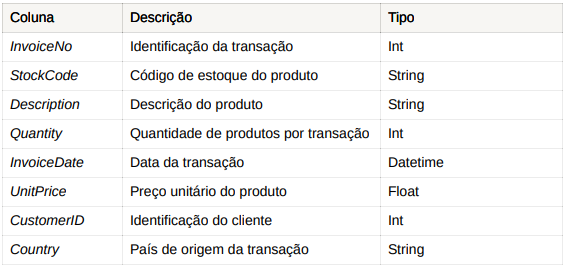

# Resultado da análise



1. Descrição dos clusters:

Dentre os modelos utilizados, a Clusterização Hierárquica apresentou uma segmentação mais detalhada entre os demais, resultando na separaçao entre 4 perfis de clientes:
  - Cluster 0: clientes com menor captação monetária, com frequência média para baixa, e recência que pode chegar a longos períodos.
  - Cluster 3: clientes com melhor capactação monetária que cluster 0, mas ainda baixa, frequência pode atingir valores mais altos que cluster 0, e a recência atinge valores médios.
  - Cluster 1: captação monetária dos clientes já começa a atingir valores altos, com frequência alta e recência atingindo períodos curtos.
  - Cluster 2: Melhor captação monetárias entre todos os clientes, com frequencias que podem atingir valores altos, mas principalmente, apresentam característica comum de recência em períodos curtos.

2. Análise da segmentação

A partir da visualização da segmentação destes clientes, o e-commerce pode filtrar a partir do ID do cliente e realizar uma análise posterior para entender quais as características dos clientes que trazem melhores retornos ao negócio, tais como idade, sexo, profissão, localização, se é pessoa física ou jurídica e assim criar campanhas específicas focado no perfil mais promissor.

3. Conclusão

Dentre os grupos, o e-commerce deveria focar nos perfis de cliente resumidos nos clusters 1 e 2.

# Bibliotecas

In [ ]:
pip install seaborn matplotlib

In [ ]:
pip install --upgrade plotly ipywidgets

In [ ]:
# Importando bibliotecas gerais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statistics import mean
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, scale
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN, dbscan, AgglomerativeClustering, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
# Montando drive de conexão com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
---

## 1) Análise Exploratória

### Carregando dataset

In [ ]:
# Carregando dataset do Google Drive

df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEX/Cases_Resolvidos/e_commerce_data.csv', encoding = 'ISO-8859-1',parse_dates=['InvoiceDate'])

In [ ]:
df_original.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
111106,545713,22382,LUNCH BAG SPACEBOY DESIGN,1,2011-03-07 10:11:00,4.13,NaN,United Kingdom
226534,556810,11001,ASSTD DESIGN RACING CAR PEN,1,2011-06-14 16:50:00,1.69,NaN,United Kingdom
533779,581113,84596F,SMALL MARSHMALLOWS PINK BOWL,16,2011-12-07 12:19:00,0.42,14534.0,United Kingdom
426439,573351,23444,Next Day Carriage,1,2011-10-30 12:34:00,15.00,13524.0,United Kingdom
405726,571716,22486,PLASMATRONIC LAMP,2,2011-10-18 17:05:00,8.29,NaN,United Kingdom
431361,573587,23389,SPACEBOY MINI BACKPACK,4,2011-10-31 14:48:00,4.15,18257.0,United Kingdom
54730,540976,22659,LUNCH BOX I LOVE LONDON,12,2011-01-12 15:00:00,1.95,12652.0,France
197967,553946,22666,RECIPE BOX PANTRY YELLOW DESIGN,6,2011-05-20 10:48:00,2.95,15601.0,United Kingdom
381017,569844,22746,POPPY'S PLAYHOUSE LIVINGROOM,6,2011-10-06 13:30:00,2.10,12626.0,Germany
518309,580115,22560,TRADITIONAL MODELLING CLAY,4,2011-12-01 16:22:00,2.46,NaN,United Kingdom


In [ ]:
df = df_original.copy()

### Descrição estatística

In [ ]:
df.describe(percentiles=[0.01,0.10,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.98,0.99])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
1%,-2.000000,0.190000,12415.000000
10%,1.000000,0.630000,12876.000000
50%,3.000000,2.080000,15152.000000
60%,5.000000,2.550000,15805.000000
70%,8.000000,3.750000,16493.000000
80%,12.000000,4.950000,17095.000000


Quantity e UnitPrice: Apresentam valores negativos. Necessário tratamento de outliers.






### Destribuição das colunas

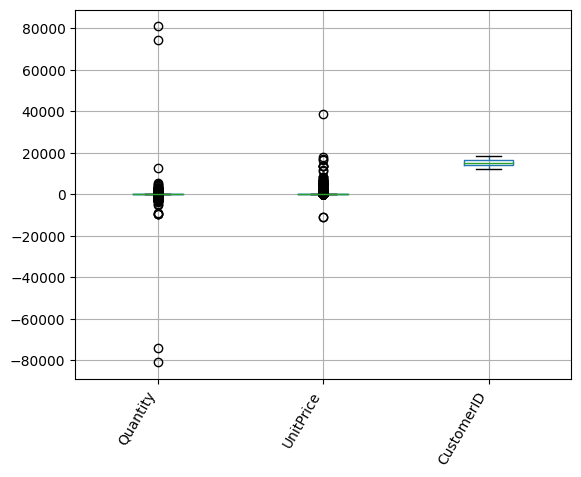

In [ ]:
# Gráfico de destribuição das features

df.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.show()

In [ ]:
# Explorando itens com 'Quantity' negativo

print('Tamanho total do dataset:',df.shape)
print('Tamanho do dataset com Quantity negativa:', df[df['Quantity']<=0].shape)

Tamanho total do dataset: (541909, 8)
Tamanho do dataset com Quantity negativa: (10624, 8)


Coluna 'Quantity' com valores negativos se relaciona com produtos devolvidos, portanto, não explicam diretamente a relação do cliente com aquela compra. Serão removidos.

In [ ]:
# Explorando itens com UnitPrice negativos

print('Tamanho total do dataset:',df.shape)
print('Tamanho do dataset com Quantity negativa:', df[df['UnitPrice']<=0].shape)

Tamanho total do dataset: (541909, 8)
Tamanho do dataset com Quantity negativa: (2517, 8)


Coluna 'UnitPrice' com valores negativos ou zerados. Não explicam o comportamento de compra do fornecedor, ou seja, não geraram receita. Serão removidos.

In [ ]:
# Realizando as alterações no dataset conforme premissas anteriores

df = df[df['Quantity']>0]
df = df[df['UnitPrice']>=0.01]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530100.000000,530100.000000,397880.000000
mean,10.542109,3.907655,15294.428491
std,155.524708,35.915815,1713.145555
min,1.000000,0.040000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Nulos

In [ ]:
# Avaliando nulos

for i in df:
  nan_count = df[i].isnull().sum()
  print(f"{i}: {nan_count}")
  print('--------')

InvoiceNo: 0
--------
StockCode: 0
--------
Description: 0
--------
Quantity: 0
--------
InvoiceDate: 0
--------
UnitPrice: 0
--------
CustomerID: 132220
--------
Country: 0
--------


'CustomerID': não necesseriamento os dados nulos impactam a análise por clustering. Será mantido.

### Duplicados

In [ ]:
# Avaliando duplicados

print(df.duplicated().value_counts())
print('============================')
print(df[df.duplicated()].sample(20))

False    524874
True       5226
dtype: int64
       InvoiceNo StockCode                         Description  Quantity  \
410473    572103     22748           POPPY'S PLAYHOUSE KITCHEN         1   
442052    574660     21636              MADRAS NOTEBOOK MEDIUM         1   
75993     542617     22291      HANGING CHICK CREAM DECORATION         1   
10058     537224     21802     CHRISTMAS TREE HEART DECORATION         3   
373950    569367     23012     GLASS APOTHECARY BOTTLE PERFUME         1   
413303    572309     21819             GLITTER CHRISTMAS STAR          2   
151527    549558     22921                 HERB MARKER CHIVES          1   
75674     542607     22931  BAKING MOULD HEART WHITE CHOCOLATE         1   
534550    581149     22807        SET OF 6 T-LIGHTS TOADSTOOLS         6   
432573    573876     21975      PACK OF 60 DINOSAUR CAKE CASES         1   
465595    576246     22627                 MINT KITCHEN SCALES         1   
413705    572318     84992      72 SWEETHEA

In [ ]:
# Eliminando duplicadas
df = df.drop_duplicates()

### Outliers

In [ ]:
# Análise estatística dos dados

df.describe(percentiles= [0.01,0.02,0.1,0.98,0.99,0.995])

,Quantity,UnitPrice,CustomerID
count,524874.000000,524874.000000,392688.000000
mean,10.616674,3.922602,15287.848903
std,156.280624,36.093163,1713.543619
min,1.000000,0.040000,12346.000000
1%,1.000000,0.290000,12415.000000
2%,1.000000,0.390000,12457.000000
10%,1.000000,0.650000,12876.000000
50%,4.000000,2.080000,15150.000000
98%,72.000000,14.950000,18119.000000
99%,100.000000,16.980000,18211.000000


In [ ]:
# Aplicando limite superior em 99,5% em 'Quantity' e "UnitPrice"

df = df[df['Quantity'] < df['Quantity'].quantile(0.995)] #1000
df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.995)] #3000

<Axes: >

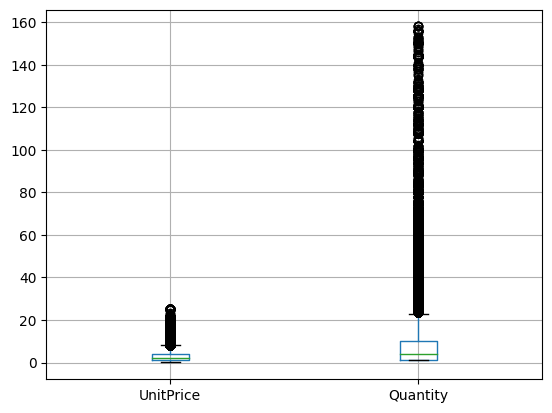

In [ ]:
df[['UnitPrice','Quantity']].boxplot()

In [ ]:
df['UnitPrice'].std()

3.125012238786856

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Dates

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y').dt.date

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


### DataEngineering - TotalValue

In [ ]:
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


### DataEngineering - RFM

In [ ]:
# Descobrindo a última para para calcular a Recência

Latest_date = df['InvoiceDate'].max()

In [ ]:
# Recency = Latest Date - Last Invoice Data
# Frequency = count of invoice number of transactions
# Monetary = Sum of total amount for each customer

RFM_scores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_date - x.max()).days,
                                           'InvoiceNo': lambda x: len(x),
                                           'TotalValue': lambda x: x.sum()})

# Renomeando as colunas

RFM_scores = RFM_scores.rename(columns={'InvoiceDate':'Recency',
                           'InvoiceNo':'Frequency',
                           'TotalValue':'Monetary'}).reset_index()



In [ ]:
RFM_scores

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,181,4060.40
1,12348.0,75,27,1437.24
2,12349.0,18,71,1417.60
3,12350.0,310,16,294.40
4,12352.0,36,77,1385.74
...,...,...,...,...
4297,18280.0,277,10,180.60
4298,18281.0,180,7,80.82
4299,18282.0,7,12,178.05
4300,18283.0,3,721,2045.53


## 2) Pré-processamento

### Destribuição dos dados

<Axes: >

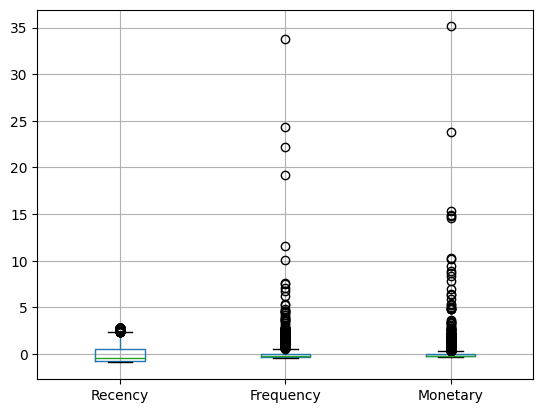

In [ ]:
# Avaliando a destribuição dos dados por boxplot

RFM_scores.drop('CustomerID', axis=1).apply(scale).boxplot()

In [ ]:
# Análise estatística do RFM_scores

RFM_scores.describe(percentiles=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.96,0.97,0.98,0.99])

,CustomerID,Recency,Frequency,Monetary
count,4302.000000,4302.000000,4302.000000,4302.000000
mean,15295.990237,92.093677,90.438401,1680.582190
std,1720.035817,99.996667,224.001709,5386.607453
min,12347.000000,0.000000,1.000000,2.900000
10%,12902.200000,5.000000,8.000000,149.924000
20%,13507.200000,14.000000,14.000000,236.050000
30%,14108.300000,22.000000,21.000000,332.055000
40%,14703.400000,32.000000,29.000000,462.210000
50%,15291.500000,50.000000,41.000000,646.490000
60%,15878.800000,71.000000,57.000000,887.446000


### Outliers RFM

In [ ]:
# Reajustando limites do RFM_Scores

RFM_scores = RFM_scores[RFM_scores['Frequency'] < RFM_scores['Frequency'].quantile(0.99)]
RFM_scores = RFM_scores[RFM_scores['Monetary'] < RFM_scores['Monetary'].quantile(0.99)]

<Axes: >

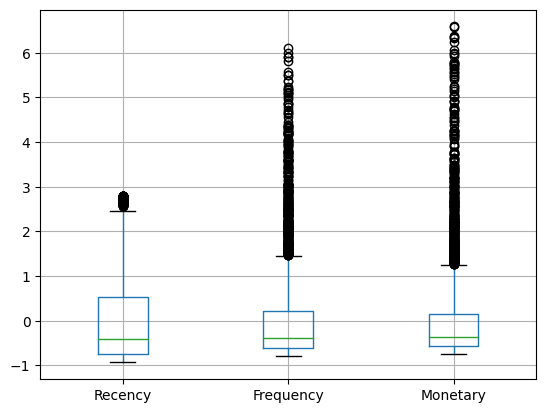

In [ ]:
# Reavaliando a destribuição dos dados por boxplot

RFM_scores.drop('CustomerID', axis=1).apply(scale).boxplot()

In [ ]:
RFM_scores.describe(percentiles=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.96,0.97,0.98,0.99])

,CustomerID,Recency,Frequency,Monetary
count,4215.000000,4215.000000,4215.000000,4215.000000
mean,15296.484698,93.825623,73.785291,1226.231677
std,1719.663473,100.276640,92.008471,1623.831327
min,12347.000000,0.000000,1.000000,2.900000
10%,12904.800000,7.000000,8.000000,147.446000
20%,13506.800000,15.000000,13.000000,231.810000
30%,14109.200000,23.000000,20.000000,328.168000
40%,14704.600000,33.000000,29.000000,450.354000
50%,15296.000000,52.000000,39.000000,626.880000
60%,15881.400000,72.000000,55.000000,851.302000


### Feature scaling

<ipython-input-113-efd4c529f9f4>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




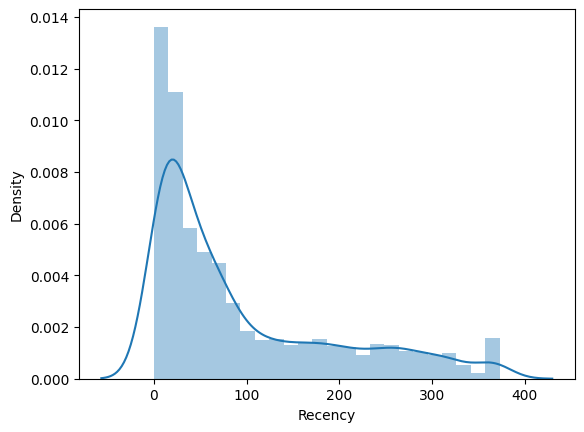

<ipython-input-113-efd4c529f9f4>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




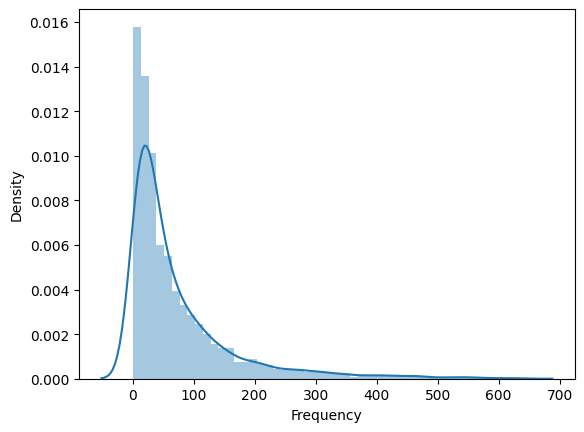

<ipython-input-113-efd4c529f9f4>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




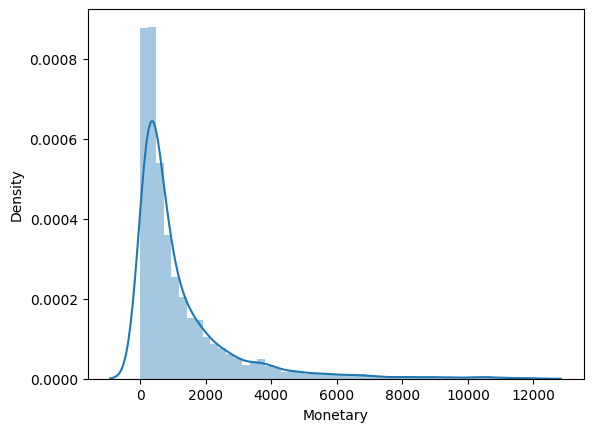

In [ ]:
# Verificando destribuição das colunas

for i in RFM_scores.columns.drop('CustomerID'):
  ax_recency = sns.distplot(RFM_scores[f'{i}'])
  plt.show()

In [ ]:
# Aplicando scaler

# Definindo scaler
scaler = MinMaxScaler()

# Treinando scaler
X = RFM_scores.copy()
X[['Recency','Frequency','Monetary']] = scaler.fit_transform(X[['Recency','Frequency','Monetary']])
X = pd.DataFrame(X).set_index('CustomerID')

# Visualizando scaling
print(X.head(10))

# Análise estatística
print(X.describe())


             Recency  Frequency  Monetary
CustomerID                               
12347.0     0.005362   0.283465  0.340415
12348.0     0.201072   0.040945  0.120338
12349.0     0.048257   0.110236  0.118690
12350.0     0.831099   0.023622  0.024456
12352.0     0.096515   0.119685  0.116017
12353.0     0.546917   0.004724  0.007224
12354.0     0.621984   0.089764  0.090316
12355.0     0.573727   0.018898  0.038299
12356.0     0.058981   0.091339  0.235630
12357.0     0.088472   0.203150  0.518469
           Recency    Frequency     Monetary
count  4215.000000  4215.000000  4215.000000
mean      0.251543     0.114623     0.102635
std       0.268838     0.144895     0.136236
min       0.000000     0.000000     0.000000
25%       0.048257     0.025197     0.024076
50%       0.139410     0.059843     0.052351
75%       0.396783     0.146457     0.124182
max       1.000000     1.000000     1.000000


## 3) Modelling

### K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

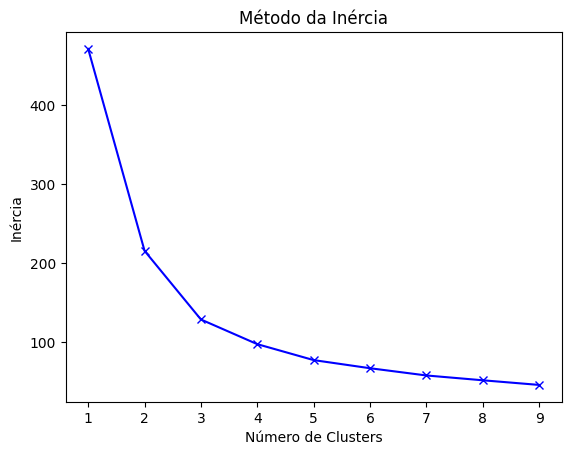

In [ ]:
# Definindo o número de clusters pelo método da Inércia

inertias = []
K = range(1,10)

for k in K:
  KmeanModel = KMeans(n_clusters=k).fit(X)
  inertias.append(KmeanModel.inertia_)

plt.plot(K,inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método da Inércia')
plt.show()

In [ ]:
# Treinando e prevendo o modelo

KmeanModel = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(X)

In [ ]:
KmeanModel_clusters = KmeanModel.fit_predict(X)

In [ ]:
KmeanModel_clusters

array([0, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
# Agrupando aos dados

RFM_scores_kmeans = RFM_scores.copy()
RFM_scores_kmeans['K-classes'] = KmeanModel_clusters

In [ ]:
# Clusters K-means

RFM_scores_kmeans.head(20)

,CustomerID,Recency,Frequency,Monetary,K-classes
0,12347.0,2,181,4060.40,0
1,12348.0,75,27,1437.24,2
2,12349.0,18,71,1417.60,2
3,12350.0,310,16,294.40,1
4,12352.0,36,77,1385.74,2
5,12353.0,204,4,89.00,1
6,12354.0,232,58,1079.40,1
7,12355.0,214,13,459.40,1
8,12356.0,22,59,2811.43,2
9,12357.0,33,130,6182.67,0


#### Avaliação

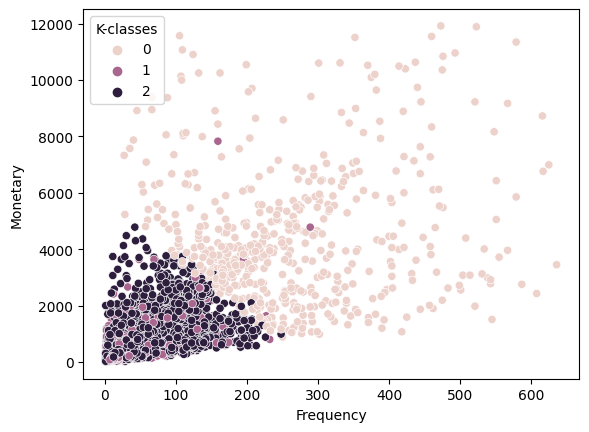

In [ ]:
ax = sns.scatterplot(x=RFM_scores_kmeans['Frequency'], y=RFM_scores_kmeans['Monetary'], hue=RFM_scores_kmeans['K-classes'])

In [ ]:
# Plotando Scatter Plot 3D

# Atribuindo os dados
x = RFM_scores_kmeans['Monetary']
y = RFM_scores_kmeans['Frequency']
z = RFM_scores_kmeans['Recency']

# Definindo os eixos
fig = px.scatter_3d(RFM_scores_kmeans, x=x,y=y,z=z, color=RFM_scores_kmeans['K-classes'])
fig.show()


In [ ]:
# Contagem de Clusters

RFM_scores_kmeans['K-classes'].value_counts()

2    2630
1    1040
0     545
Name: K-classes, dtype: int64

In [ ]:
# Análise estatística das classes

for i in RFM_scores_kmeans['K-classes'].unique():
  print(f'Cluster: {i}\n')
  print(RFM_scores_kmeans[RFM_scores_kmeans['K-classes'] == i].describe())
  print('=====================================================================')

Cluster: 0

         CustomerID     Recency   Frequency      Monetary  K-classes
count    545.000000  545.000000  545.000000    545.000000      545.0
mean   15159.346789   21.678899  257.994495   4380.665211        0.0
std     1741.475135   26.665025  119.993895   2344.928269        0.0
min    12347.000000    0.000000   27.000000    885.800000        0.0
25%    13576.000000    4.000000  169.000000   2755.010000        0.0
50%    15114.000000   14.000000  233.000000   3809.890000        0.0
75%    16712.000000   29.000000  321.000000   5488.180000        0.0
max    18272.000000  211.000000  636.000000  11922.160000        0.0
Cluster: 2

         CustomerID      Recency    Frequency     Monetary  K-classes
count   2630.000000  2630.000000  2630.000000  2630.000000     2630.0
mean   15303.165019    47.100000    54.168821   888.948532        2.0
std     1717.155518    37.451125    44.045574   746.109338        0.0
min    12348.000000     0.000000     1.000000     4.950000        2.0
25%  

### DBSCAN



In [ ]:
# Definindo dataset

RFM_scores_DBSCAN = RFM_scores.copy().set_index('CustomerID')
RFM_scores_DBSCAN


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,18,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74
...,...,...,...
18278.0,73,9,173.90
18280.0,277,10,180.60
18281.0,180,7,80.82


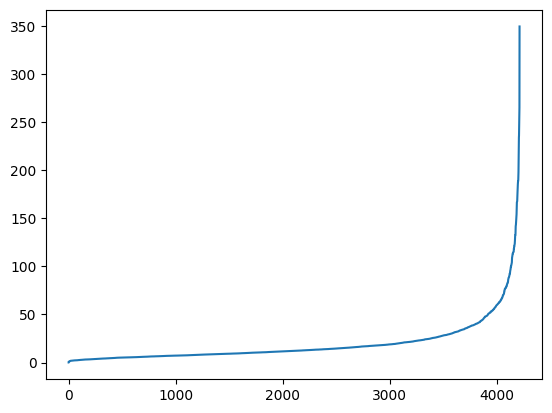

In [ ]:
# Avaliando hiperparâmetros
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(RFM_scores_DBSCAN)
distances, indices = nn_model.kneighbors(RFM_scores_DBSCAN)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

In [ ]:
# Treinando DBSCAN

model = DBSCAN(eps=75)
labels = model.fit_predict(RFM_scores_DBSCAN)

In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Agrupando aos dados

RFM_scores_DBSCAN['K-classes'] = labels

#### Avaliação

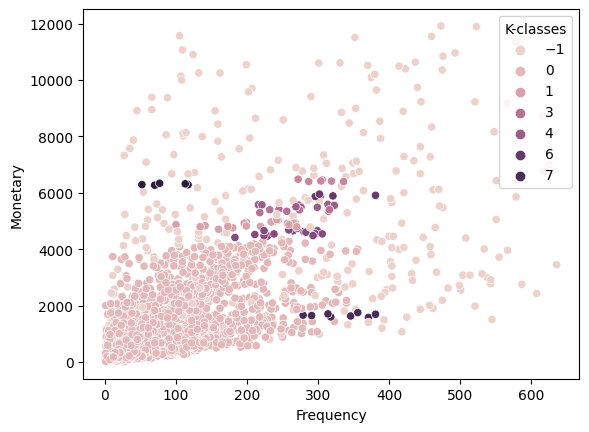

In [ ]:
ax = sns.scatterplot(x=RFM_scores_DBSCAN['Frequency'], y=RFM_scores_DBSCAN['Monetary'], hue=RFM_scores_DBSCAN['K-classes'])
# ax.scatter(*model.cluster_centers_.T, marker='*',s=500, color='black')

In [ ]:
# Plotando Scatter Plot 3D

# Atribuindo os dados
x = RFM_scores_DBSCAN['Monetary']
y = RFM_scores_DBSCAN['Frequency']
z = RFM_scores_DBSCAN['Recency']

# Definindo os eixos
fig = px.scatter_3d(RFM_scores_DBSCAN, x=x,y=y,z=z, color=RFM_scores_DBSCAN['K-classes'])
fig.show()


In [ ]:
# Contagem de Clusters

RFM_scores_DBSCAN['K-classes'].value_counts()

 0    3866
-1     275
 1      19
 5      16
 4       8
 7       8
 3       7
 2       6
 6       5
 8       5
Name: K-classes, dtype: int64

In [ ]:
# Análise estatística das classes

for i in RFM_scores_DBSCAN['K-classes'].unique():
  print(f'Cluster: {i}\n')
  print(RFM_scores_DBSCAN[RFM_scores_DBSCAN['K-classes'] == i].describe())
  print('=====================================================================')

Cluster: 0

           Recency    Frequency     Monetary  K-classes
count  3866.000000  3866.000000  3866.000000     3866.0
mean     97.579152    56.108639   875.419242        0.0
std     100.624447    57.892876   876.854041        0.0
min       0.000000     1.000000     2.900000        0.0
25%      21.000000    15.000000   265.320000        0.0
50%      57.000000    35.000000   550.035000        0.0
75%     155.000000    78.000000  1169.080000        0.0
max     373.000000   356.000000  4279.710000        0.0
Cluster: -1

          Recency   Frequency      Monetary  K-classes
count  275.000000  275.000000    275.000000      275.0
mean    61.807273  274.298182   5175.367455       -1.0
std     94.441207  167.933767   2877.509815        0.0
min      0.000000    5.000000    758.270000       -1.0
25%      5.000000  121.000000   2762.980000       -1.0
50%     17.000000  289.000000   4623.300000       -1.0
75%     62.000000  408.000000   7128.410000       -1.0
max    372.000000  636.000000  

In [ ]:
# Análise estatística das classes

for i in RFM_scores_DBSCAN['K-classes'].unique():
  print(f'Cluster: {i}\n')
  print(RFM_scores_DBSCAN[RFM_scores_DBSCAN['K-classes'] == i].describe())
  print('=====================================================================')

Cluster: 0

           Recency    Frequency     Monetary  K-classes
count  3866.000000  3866.000000  3866.000000     3866.0
mean     97.579152    56.108639   875.419242        0.0
std     100.624447    57.892876   876.854041        0.0
min       0.000000     1.000000     2.900000        0.0
25%      21.000000    15.000000   265.320000        0.0
50%      57.000000    35.000000   550.035000        0.0
75%     155.000000    78.000000  1169.080000        0.0
max     373.000000   356.000000  4279.710000        0.0
Cluster: -1

          Recency   Frequency      Monetary  K-classes
count  275.000000  275.000000    275.000000      275.0
mean    61.807273  274.298182   5175.367455       -1.0
std     94.441207  167.933767   2877.509815        0.0
min      0.000000    5.000000    758.270000       -1.0
25%      5.000000  121.000000   2762.980000       -1.0
50%     17.000000  289.000000   4623.300000       -1.0
75%     62.000000  408.000000   7128.410000       -1.0
max    372.000000  636.000000  

### Hieranquical Clus

In [ ]:
# Defindindo dataset

RFM_scores_Hier = RFM_scores.copy().set_index('CustomerID')
RFM_scores_Hier

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,18,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74
...,...,...,...
18278.0,73,9,173.90
18280.0,277,10,180.60
18281.0,180,7,80.82


In [ ]:
# Treinando modelo e gerando clusters

model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(RFM_scores_Hier)

In [ ]:
labels

array([1, 0, 0, ..., 0, 0, 3])

In [ ]:
RFM_scores_Hier['K-classes']  = labels

#### Avaliação

In [ ]:
# Plotando Scatter Plot 3D

# Atribuindo os dados
x = RFM_scores_Hier['Monetary']
y = RFM_scores_Hier['Frequency']
z = RFM_scores_Hier['Recency']

# Definindo os eixos
fig = px.scatter_3d(RFM_scores_Hier, x=x,y=y,z=z, color=RFM_scores_Hier['K-classes'])
fig.show()

In [ ]:
# # Contagem de Clusters

RFM_scores_Hier['K-classes'].value_counts()

0    3363
3     472
1     322
2      58
Name: K-classes, dtype: int64

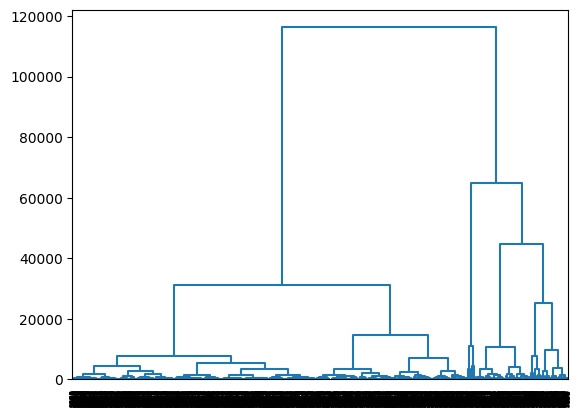

<Figure size 1000x5000 with 0 Axes>

In [ ]:
# Hierarchical clustering with scipy

Z = linkage(RFM_scores_Hier, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.figure(figsize=(10,50))
plt.show()

In [ ]:
fcluster(Z, 4, criterion='maxclust')

array([4, 1, 1, ..., 1, 1, 3], dtype=int32)

In [ ]:
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(RFM_scores_Hier, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

Método "Ward" é o único que entrega uma visão minimamente eficiente

In [ ]:
# Análise estatística das classes

for i in RFM_scores_Hier['K-classes'].unique():
  print(f'Cluster: {i}\n')
  print(RFM_scores_Hier[RFM_scores_Hier['K-classes'] == i].describe())
  print('=====================================================================')

Cluster: 1

          Recency   Frequency     Monetary  K-classes
count  322.000000  322.000000   322.000000      322.0
mean    25.826087  223.913043  4673.667733        1.0
std     41.201211  122.535132  1147.515641        0.0
min      0.000000   11.000000  3285.310000        1.0
25%      4.000000  138.000000  3719.105000        1.0
50%     14.000000  206.000000  4316.505000        1.0
75%     30.000000  291.250000  5474.357500        1.0
max    372.000000  636.000000  7634.730000        1.0
Cluster: 0

           Recency    Frequency     Monetary  K-classes
count  3363.000000  3363.000000  3363.000000     3363.0
mean    109.137972    44.377639   589.467951        0.0
std     104.483358    48.938349   447.483304        0.0
min       0.000000     1.000000     2.900000        0.0
25%      25.000000    14.000000   230.910000        0.0
50%      66.000000    29.000000   447.640000        0.0
75%     179.000000    58.000000   846.670000        0.0
max     373.000000   545.000000  1810.7700

### Mean-Shift

In [ ]:
# Definindo dataset

RFM_scores_MS = RFM_scores.copy().set_index('CustomerID')
RFM_scores_MS

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,18,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74
...,...,...,...
18278.0,73,9,173.90
18280.0,277,10,180.60
18281.0,180,7,80.82


In [ ]:
# Estimating bandwidth
estimate_bandwidth(RFM_scores_MS)

841.1920600814834

In [ ]:
# Treinando modelo e gerando clusters

model = MeanShift(bandwidth=841.1920600814834)
labels = model.fit_predict(RFM_scores_MS)

In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
RFM_scores_MS['K-classes']  = labels

#### Avaliação

In [ ]:
# Plotando Scatter Plot 3D

# Atribuindo os dados
x = RFM_scores_MS['Monetary']
y = RFM_scores_MS['Frequency']
z = RFM_scores_MS['Recency']

# Definindo os eixos
fig = px.scatter_3d(RFM_scores_MS, x=x,y=y,z=z, color=RFM_scores_MS['K-classes'])
fig.show()

In [ ]:
# Contagem de Clusters

RFM_scores_MS['K-classes'].value_counts()

0    4002
1     179
2      34
Name: K-classes, dtype: int64

In [ ]:
# Análise estatística das classes

for i in RFM_scores_MS['K-classes'].unique():
  print(f'Cluster: {i}\n')
  print(RFM_scores_MS[RFM_scores_MS['K-classes'] == i].describe())
  print('=====================================================================')

Cluster: 0

           Recency    Frequency     Monetary  K-classes
count  4002.000000  4002.000000  4002.000000     4002.0
mean     97.655672    63.478011   933.936107        0.0
std     101.081079    76.038182   935.032304        0.0
min       0.000000     1.000000     2.900000        0.0
25%      21.000000    16.000000   276.115000        0.0
50%      57.000000    37.000000   583.080000        0.0
75%     155.000000    83.000000  1291.607500        0.0
max     373.000000   636.000000  4371.130000        0.0
Cluster: 1

          Recency   Frequency     Monetary  K-classes
count  179.000000  179.000000   179.000000      179.0
mean    22.804469  256.145251  6020.808994        1.0
std     42.099278  132.747040  1257.832906        0.0
min      0.000000   27.000000  4397.300000        1.0
25%      3.000000  159.000000  4923.955000        1.0
50%     11.000000  259.000000  5725.470000        1.0
75%     23.000000  333.000000  6775.090000        1.0
max    372.000000  625.000000  8995.5200